In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
pip install fastparquet

     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 136 kB 45.9 MB/s 
     |████████████████████████████████| 1.6 MB 29.6 MB/s 


In [ ]:
!unzip /content/ords_prods_cust.zip

Archive:  /content/ords_prods_cust.zip
  inflating: ords_prods_cust/ords_prods_cust1.parquet  
  inflating: ords_prods_cust/ords_prods_cust10.parquet  
  inflating: ords_prods_cust/ords_prods_cust11.parquet  
  inflating: ords_prods_cust/ords_prods_cust12.parquet  
  inflating: ords_prods_cust/ords_prods_cust13.parquet  
  inflating: ords_prods_cust/ords_prods_cust14.parquet  
  inflating: ords_prods_cust/ords_prods_cust15.parquet  
  inflating: ords_prods_cust/ords_prods_cust16.parquet  
  inflating: ords_prods_cust/ords_prods_cust17.parquet  
  inflating: ords_prods_cust/ords_prods_cust18.parquet  
  inflating: ords_prods_cust/ords_prods_cust19.parquet  
  inflating: ords_prods_cust/ords_prods_cust2.parquet  
  inflating: ords_prods_cust/ords_prods_cust20.parquet  
  inflating: ords_prods_cust/ords_prods_cust21.parquet  
  inflating: ords_prods_cust/ords_prods_cust22.parquet  
  inflating: ords_prods_cust/ords_prods_cust23.parquet  
  inflating: ords_prods_cust/ords_prods_cust24.parq

In [ ]:
df_insta = pd.read_parquet('/content/ords_prods_cust/', engine='fastparquet')

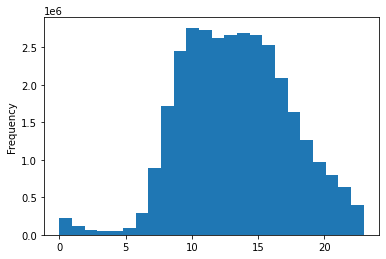

In [ ]:
hist_order_time=df_insta['order_hour_of_day'].plot.hist(bins = 24)

This histogram demonstrates that most orders happen during typical business hours (9am to 5 or 6pm).

In [ ]:
df_insta.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196,1.0,0.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


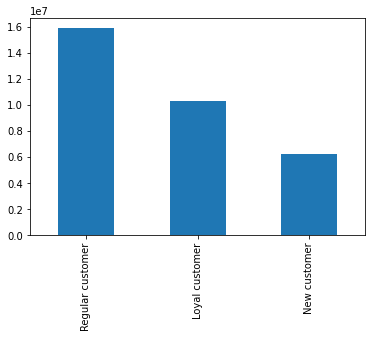

In [ ]:
loyalty_bar_chart=df_insta['loyalty_flag'].value_counts().plot.bar()

In [ ]:
hist_order_time.figure.savefig('/content/order_time_histogram.png')

In [ ]:
loyalty_bar_chart.figure.savefig('/content/loyalty_bar_chart.png')

In [ ]:
import terality as pd
import numpy as np
import os

In [ ]:
path = r'C:\Users\dbnewman18\Instacart_Basket_Analysis_31_03-2022'

In [ ]:
df_insta= pd.read_parquet(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust/'))

C:\Users\dbnewman18\Instacart_Basket_Analysis_31_03-2022\02 Data\Prepared Data\


In [ ]:
# Create a list holding True/False values to the test np.random.rand()<=0.7
np.random.seed(4)
dev = np.random.rand(len(df_insta)) <= 0.7

In [ ]:
# Store 70% of the sample in the dataframe big_df
big_df=df_insta[dev]

uploading data:   0%|                              | 0.00/4.06M [00:00<?, ?B/s]
INFO:terality:The result of te.ndarray.from_ndarray was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].


In [ ]:
# Store 30% of the sample in the dataframe small
small_df=df_insta[~dev]

uploading data:   0%|                              | 0.00/4.06M [00:00<?, ?B/s]
INFO:terality:The result of te.ndarray.from_ndarray was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].


In [ ]:
small_df.to_parquet_folder(os.path.join(path, '02 Data','Prepared Data', 'small_insta*.parquet'))

In [ ]:
smaller_df= small_df[['order_hour_of_day','prices']]

In [ ]:
smaller_df.to_parquet(os.path.join(path, '02 Data','Prepared Data', 'small_hours_prices.parquet'))

In [3]:
df_small_hours_prices = pd.read_parquet('/content/small_hours_prices.parquet', engine='fastparquet')

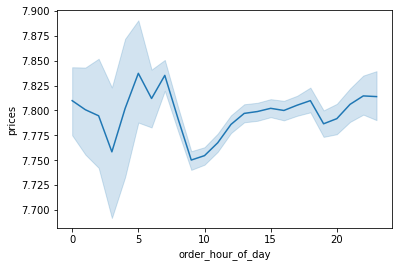

In [4]:
line_hours_prices = sns.lineplot(data =df_small_hours_prices, x = 'order_hour_of_day',y = 'prices')

Peak expenditures appear to be in the early morning between about 5 and 8am.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df_age_dependents = pd.read_parquet('/content/age_dependents.parquet', engine='fastparquet')

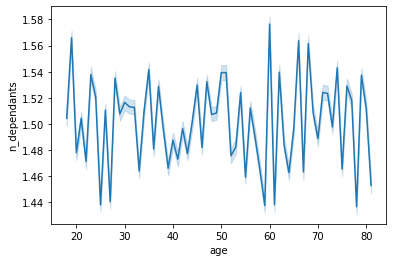

In [4]:
line_age_dependents = sns.lineplot(data =df_age_dependents, x = 'age',y = 'n_dependants')

Number of dependents does not seem to follow an easily discernible pattern, trend or relationship. A scatterplot might be a better option in this case. Peak number of dependents are around 60 and 20 years of age. Average number of dependents across all ages appears to be 1.5.

In [5]:
line_age_dependents.figure.savefig('/content/lime_age_dependents.png')

In [6]:
df_age_income=pd.read_parquet('/content/age_income.parquet', engine='fastparquet')

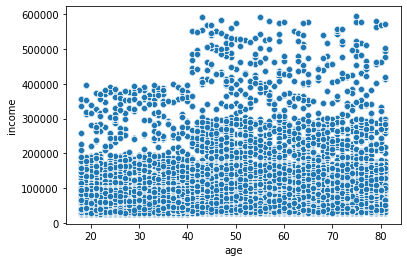

In [8]:
age_income_scatter=sns.scatterplot(x = 'age', y = 'income',data = df_age_income)

Most income is concentrated in the 1000 to 30,000 range across all age groups. The upper range increases dramatically after age 40.

In [9]:
age_income_scatter.figure.savefig('/content/age_income_scatter.png')